In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re
plt.style.use('ggplot')


### Data Loading & Merging

In [2]:
linguist = pd.read_csv('./spam_ling.csv')
enron = pd.read_csv('./spam_enron.csv')




In [3]:
enron = enron.rename(columns=str.lower)
enron = enron.rename(columns={"spam/ham": "label"})
enron['label'] = enron['label'].map({"ham": 0 , "spam": 1})



In [4]:
enron = enron.drop(['message id', 'date'], axis=1)

In [5]:
df = pd.concat([linguist, enron])

In [6]:
df.shape

(36609, 3)

In [7]:
df.head(20)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


In [135]:
df.describe()

,label
count,36609.000000
mean,0.482177
std,0.499689
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Data Cleaning (Removing Duplicated Values & Empty Values)

In [8]:
print("Null Values (Before): ", df.isna().sum())
df['subject'] = df['subject'].fillna('')
df['message'] = df['message'].fillna('')
print("Null Values (After): ", df.isna().sum())

Null Values (Before):  subject    351
message    371
label        0
dtype: int64
Null Values (After):  subject    0
message    0
label      0
dtype: int64


### Joining Data & Dropping Unneccesary Table

In [9]:
df['text'] = df['subject'] + " " + df['message']
df.drop(['subject', 'message'], axis=1, inplace=True)

In [10]:
df.head(20)

,label,text
0,0,job posting - apple-iss research center conten...
1,0,"lang classification grimes , joseph e . and b..."
2,0,query : letter frequencies for text identifica...
3,0,risk a colleague and i are researching the dif...
4,0,request book information earlier this morning ...
5,0,call for abstracts : optimality in syntactic t...
6,0,m . a . in scandinavian linguistics m . a . in...
7,0,call for papers : linguistics session of the m...
8,0,foreign language in commercials content - leng...
9,0,fulbright announcement : please post / dissemi...


### Finding Number of Duplicate having same Subjects & Message

In [11]:
print("Duplicate Values Before: ", df.duplicated(subset=['text']).sum())
df.loc[df.duplicated(subset=['text'])]
df.drop_duplicates(inplace=True)
print("Duplicate After: ", df.duplicated(subset=['text']).sum())


Duplicate Values Before:  3239
Duplicate After:  0


In [12]:
df.shape

(33370, 2)

In [13]:
df.head(20)

,label,text
0,0,job posting - apple-iss research center conten...
1,0,"lang classification grimes , joseph e . and b..."
2,0,query : letter frequencies for text identifica...
3,0,risk a colleague and i are researching the dif...
4,0,request book information earlier this morning ...
5,0,call for abstracts : optimality in syntactic t...
6,0,m . a . in scandinavian linguistics m . a . in...
7,0,call for papers : linguistics session of the m...
8,0,foreign language in commercials content - leng...
9,0,fulbright announcement : please post / dissemi...


### Counting Number of Spams & Hams

In [14]:
lc = df['label'].value_counts(normalize=True) * 100
ham = lc.get(0)
spam = lc.get(1)
ratio = ham/spam
print(f"Ratio: {ratio:.2f}" )

Ratio: 1.22


### Feature Engineering

In [15]:
df['chars'] = df['text'].str.len()
df['words'] = df['text'].str.split().str.len()
df['digit_ratio'] = df['text'].apply(lambda x: sum(1 for c in x if c.isdigit()) / len(x))
df['symbols'] = df['text'].apply(lambda x: len(re.findall(r'[!?.@#$]', x)))

In [17]:
df['has_url'] = df['text'].apply(lambda x: 1 if re.search(r'http|https|www|bit\.ly', x) else 0)

In [18]:
df.tail(20)

,label,text,chars,words,digit_ratio,symbols,has_url
33688,1,pennystocks can make you money ; apwl - pk _ s...,3736,702,0.011242,26,0
33689,1,"amazing stuff at great prices dear friend ,\nw...",457,94,0.000000,8,1
33691,1,quicker effects . lesser costs . best bargain ...,1048,217,0.000954,24,1
33692,1,we have marked down the prices on all tablets ...,939,185,0.003195,22,1
33694,1,re [ 9 ] : letter about our progs mult\ngua\nm...,1837,532,0.007621,33,0
33695,1,re [ 9 ] : letter about your soft mult\ngua\nm...,1814,531,0.008269,33,0
33696,1,re [ 4 ] : talks about their soft mult\ngua\nm...,1804,529,0.008315,33,0
33699,1,re [ 2 ] : question about our progs mult\ngua\...,1810,529,0.008287,32,0
33700,1,re [ 2 ] : question about their soft mult\ngua...,1860,535,0.008065,34,0
33702,1,re [ 7 ] : talks about their soft mult\ngua\nm...,1905,535,0.007874,33,0


## Cleaning Common Words

In [19]:
def clean_text(text):
    common = {'the','is','and','to','of','in','for','on','with','a','an'}
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = [w for w in text.split() if w not in common]
    return " ".join(words)

df['text'] = df['text'].apply(clean_text)

## Dropping Unneccesary Tables


In [20]:
df.insert(0, 'text', df.pop('text'))
df.head()

,text,label,chars,words,digit_ratio,symbols,has_url
0,job posting appleiss research center content l...,0,2897,590,0.011046,23,0
1,lang classification grimes joseph e barbara f ...,0,1802,344,0.028302,40,0
2,query letter frequencies text identification i...,0,1487,287,0.040350,20,0
3,risk colleague i are researching differing deg...,0,330,61,0.000000,4,0
4,request book information earlier this morning ...,0,1072,235,0.000000,12,0


In [21]:
df['lexical_diversity'] = df['text'].apply(lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0)
df['avg_word_len'] = df['chars'] / df['words'].replace(0, 1)

## Visualization

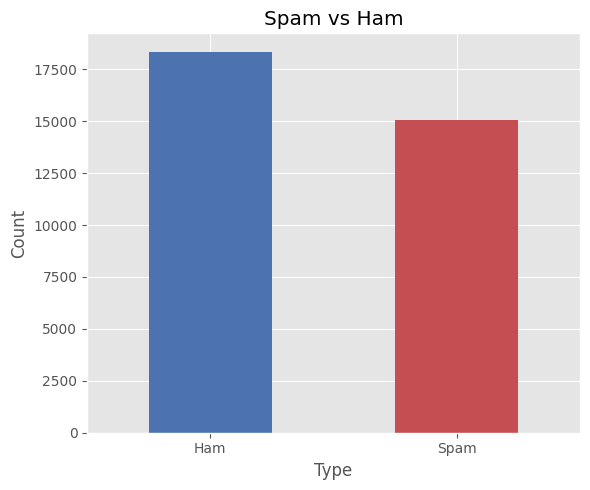

In [22]:
plt.figure(figsize=(6, 5))
df['label'].value_counts().plot(
    kind='bar',
    color=['#4C72B0', '#C44E52']
)
plt.ylabel('Count')
plt.xlabel('Type')
plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)
plt.title("Spam vs Ham")
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Character Count')

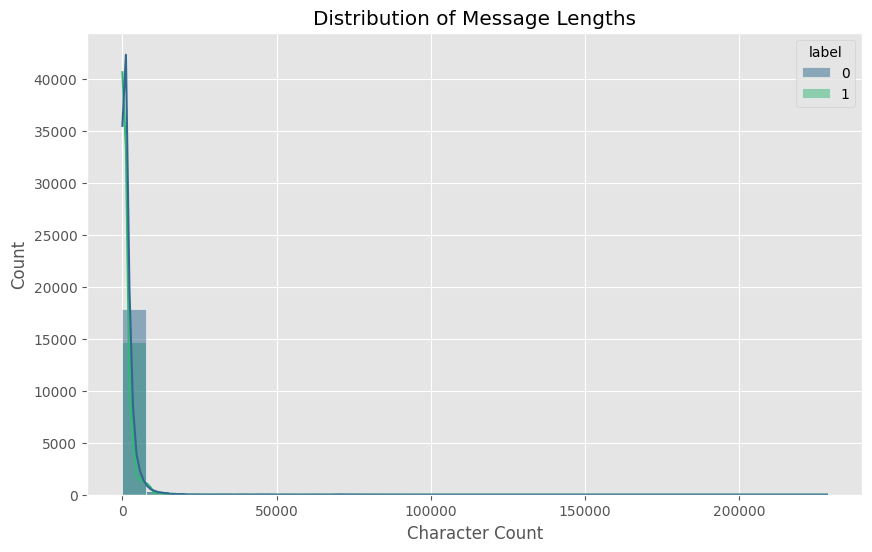

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chars', hue='label', kde=True, bins=30, palette='viridis')
plt.title('Distribution of Message Lengths')
plt.xlabel('Character Count')

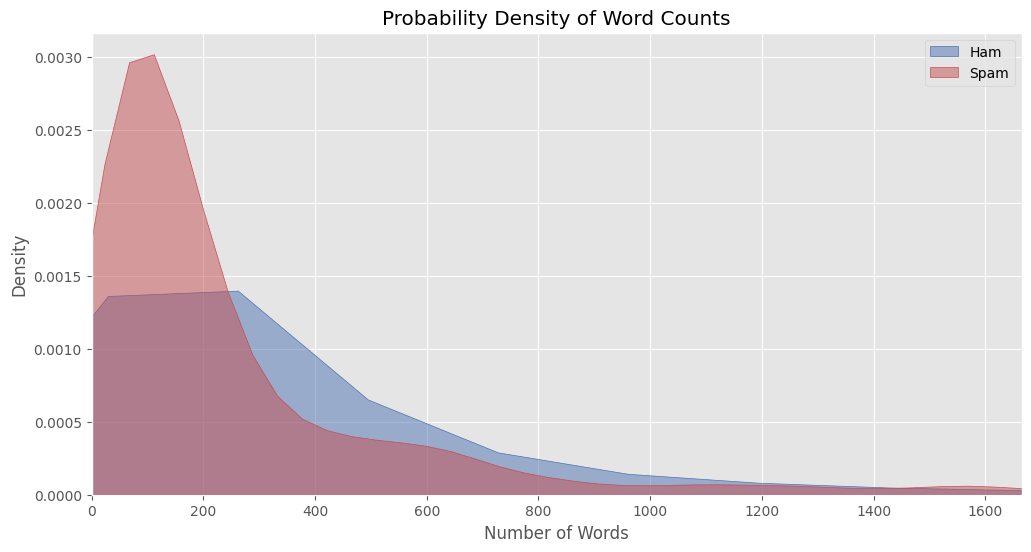

In [24]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['label'] == 0]['words'], fill=True, color='#4C72B0', label='Ham', alpha=0.5)
sns.kdeplot(df[df['label'] == 1]['words'], fill=True, color='#C44E52', label='Spam', alpha=0.5)

plt.title('Probability Density of Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, df['words'].quantile(0.98)) # Zoom in to hide extreme outliers
plt.show()

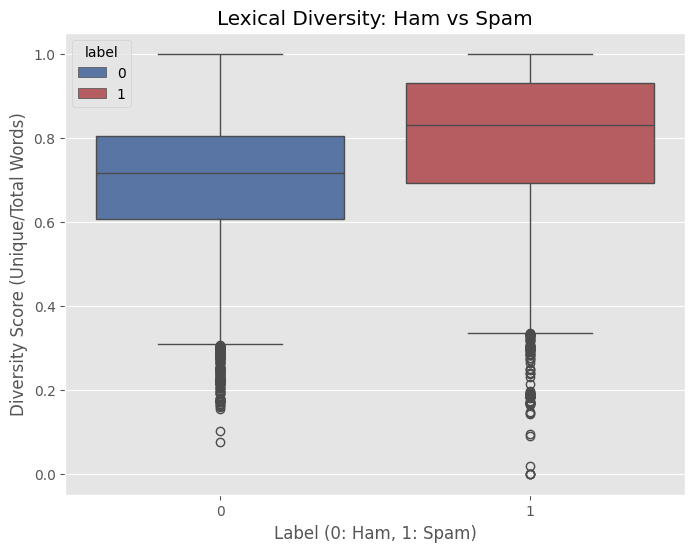

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', hue='label', y='lexical_diversity', data=df, palette=['#4C72B0', '#C44E52'])

plt.title('Lexical Diversity: Ham vs Spam')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Diversity Score (Unique/Total Words)')
plt.show()

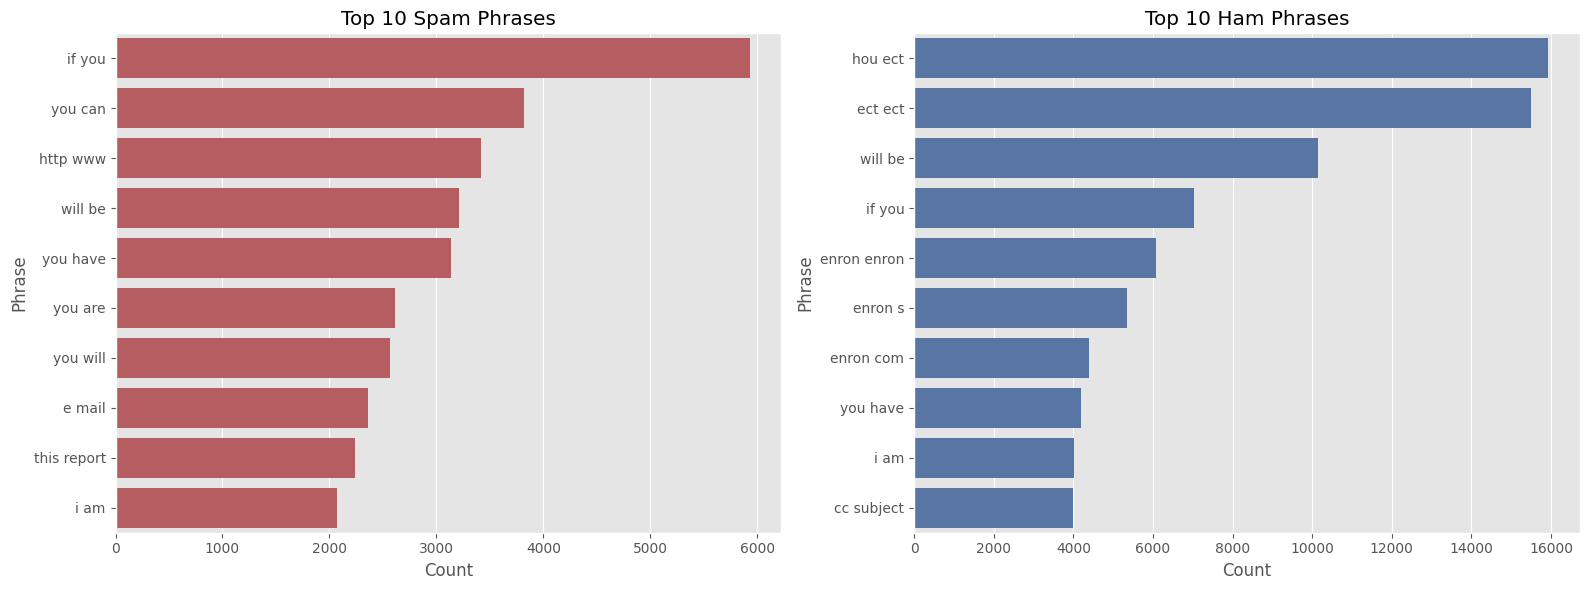

In [26]:
from collections import Counter

def plot_top_phrases(text_series, title, color):
    ngram_counts = Counter()
    for text in text_series:
        words = str(text).lower().split()
        bigrams = [f"{words[i]} {words[i+1]}" for i in range(len(words)-1)]
        ngram_counts.update(bigrams)

    top_df = pd.DataFrame(ngram_counts.most_common(10), columns=['Phrase', 'Count'])
    sns.barplot(x='Count', y='Phrase', data=top_df, color=color)
    plt.title(title)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_top_phrases(df[df['label']==1]['text'], 'Top 10 Spam Phrases', '#C44E52')

plt.subplot(1, 2, 2)
plot_top_phrases(df[df['label']==0]['text'], 'Top 10 Ham Phrases', '#4C72B0')
plt.tight_layout()
plt.show()

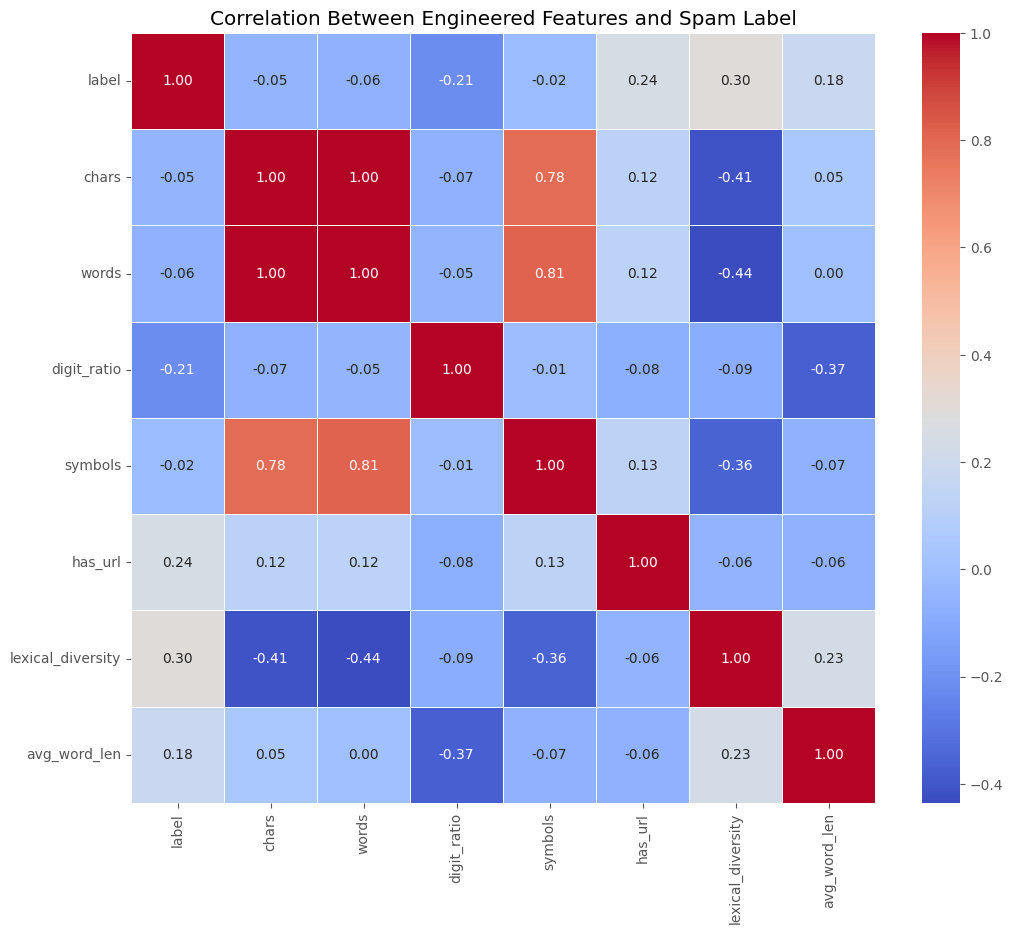

In [29]:
plt.figure(figsize=(12, 10))
cols_to_fix = ['label', 'chars', 'words', 'digit_ratio', 'symbols', 'has_url', 'lexical_diversity', 'avg_word_len']
correlation_matrix = df[cols_to_fix].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Engineered Features and Spam Label')
plt.show()

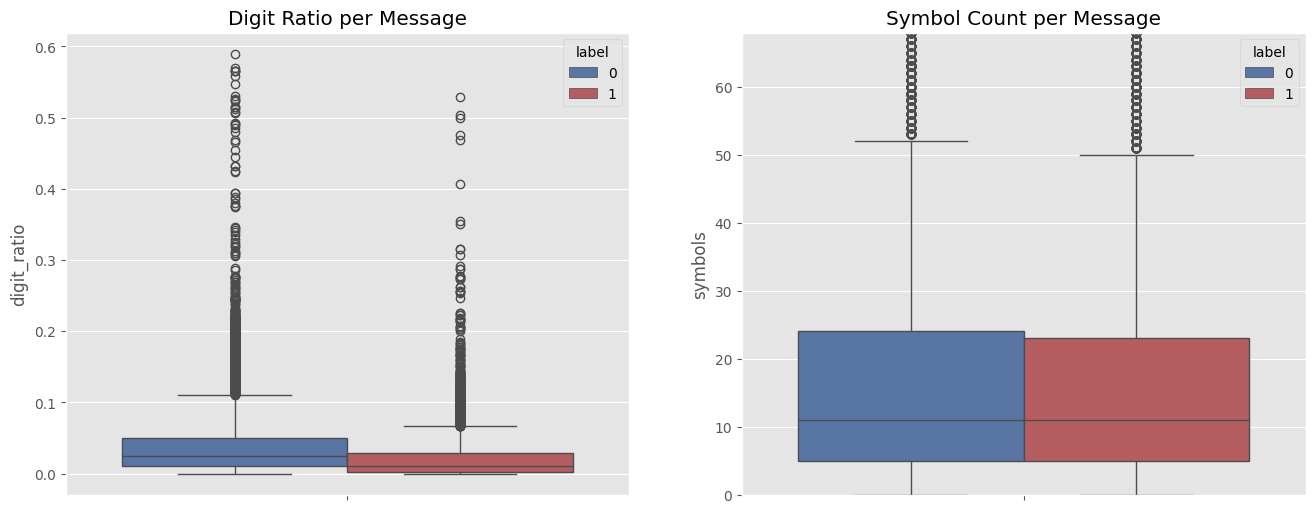

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(hue='label', y='digit_ratio', data=df, palette=['#4C72B0', '#C44E52'], ax=axes[0])
axes[0].set_title('Digit Ratio per Message')

sns.boxplot(hue='label', y='symbols', data=df, palette=['#4C72B0', '#C44E52'], ax=axes[1])
axes[1].set_title('Symbol Count per Message')
axes[1].set_ylim(0, df['symbols'].quantile(0.95))

plt.show()

In [31]:
df.to_csv("spam_dataset.csv", index=False)